In [1]:
# lets start by getting the data
import csv
import math
import urllib2
import json
import re
import os
import calendar
import json
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt

from datetime import datetime
from collections import Counter, defaultdict
from __future__  import division

In [2]:
# Get data line by line from tmdb-5000-movie-database and save the data as dictionary
filepath = r"C:\Users\helga\Dropbox\Ingvar\FinalProject\Data\tmdb-5000-movie-dataset\tmdb_5000_credits.csv"
tmdb_5000_credits = defaultdict(dict)

with open(filepath) as csvfile:
    reader = csv.DictReader(csvfile, delimiter=",")
    for row in reader:
        tmdb_5000_credits[row["title"]] = row
        # put the lists and dictonaries to a correct format, (that is not as string)
        tmdb_5000_credits[row["title"]]['cast'] = json.loads(tmdb_5000_credits[row["title"]]['cast'])
        tmdb_5000_credits[row["title"]]['crew'] = json.loads(tmdb_5000_credits[row["title"]]['crew'])
    

        

In [3]:

for title in sorted(tmdb_5000_credits.keys()):
    title = title.replace(" ","-").replace("(","").replace(")","")


In [4]:
# Get data line by line from tmdb-5000-movie-database and save the data as dictionary

filepath = r"C:\Users\helga\Dropbox\Ingvar\FinalProject\Data\tmdb-5000-movie-dataset\tmdb_5000_movies.csv"
tmdb_5000_movies = defaultdict(dict)

with open(filepath) as csvfile:
    reader = csv.DictReader(csvfile, delimiter=",")
    for row in reader:
        tmdb_5000_movies[row["title"]] = row
        # put the lists and dictonaries to a correct format, (that is not as string)
        tmdb_5000_movies[row["title"]]['genres'] = json.loads(tmdb_5000_movies[row["title"]]['genres'])
        tmdb_5000_movies[row["title"]]['keywords'] = json.loads(tmdb_5000_movies[row["title"]]['keywords'])
        tmdb_5000_movies[row["title"]]['production_companies'] = json.loads(tmdb_5000_movies[row["title"]]['production_companies'])
        
for title in sorted(tmdb_5000_movies.keys()):
    title = title.replace(" ","-").replace("(","").replace(")","")

### Lets find the covariance between vote_average and budget, of the films

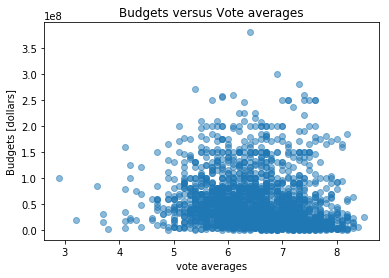

The covariance between averge votes and the budget is: 
[[ 1.         -0.13561858]
 [-0.13561858  1.        ]]


In [5]:

vote_average_budget = [] # tuples of vote_averages and budget for each movie
for title in tmdb_5000_movies.keys():
    # we treat movie´s with less than 300 vote count as noise
    if float(tmdb_5000_movies[title]['vote_count'])  > 300:
        budget = float(tmdb_5000_movies[title]['budget'])
        vote_average = float(tmdb_5000_movies[title]['vote_average'])
        vote_average_budget.append((vote_average, budget))
    

vote_averages = []
budgets = []

# sort by rating since that is going to be our x-axis
for values in sorted(vote_average_budget):
    # if a movie has no budget, we treat it as noise
    if values[1] > 0:
        vote_averages.append(values[0])
        budgets.append(values[1])
    
   

# Lets plot the data
plt.plot(vote_averages, budgets, 'o', alpha = 0.5)
plt.title('Budgets versus Vote averages')
plt.xlabel('vote averages')
plt.ylabel('Budgets [dollars]')
plt.show()

# find the covariance:
print "The covariance between averge votes and the budget is: "
print np.corrcoef(vote_averages, budgets)
    


### The covariance between popularity and Relase Month

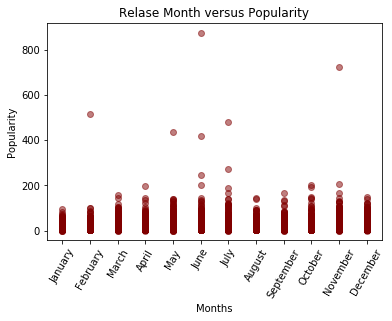

The covariance between averge votes and the budget is: 
[[ 1.         -0.13561858]
 [-0.13561858  1.        ]]


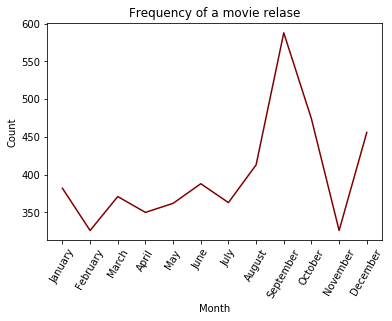

In [6]:
poopularity_date = [] # tuples of dates and popluarities in seconds for each movie
for title in tmdb_5000_movies.keys():
    popularity = float(tmdb_5000_movies[title]['popularity'])
    date = tmdb_5000_movies[title]['release_date'].split('-')
    # ensure we have a date and popularity for the film
    if len(date) > 1 and popularity > 0:
        month = int(date[1])
        poopularity_date.append((month, popularity))
    
months = []
popularities = []

# sort by date since that is going to be our x-axis
for values in sorted(poopularity_date):
    # collect the data for plotting
    months.append(values[0])
    popularities.append(values[1])


# Lets plot the data..
plt.plot(months, popularities, 'o', alpha = 0.5, color = 'maroon')
plt.title('Relase Month versus Popularity')
plt.xlabel('Months')
plt.ylabel('Popularity')
plt.xticks( range(1, 13), calendar.month_name[1:13], rotation=60 )
plt.show()

# find the covariance:
print "The covariance between averge votes and the budget is: "
print np.corrcoef(vote_averages, budgets)

# count the number of times a movie is relased in each month
months_count = Counter(months)
plt.plot(months_count.keys(), months_count.values(), color = 'maroon')
plt.title('Frequency of a movie relase')
plt.xlabel('Month')
plt.ylabel('Count')
plt.xticks( range(1, 13), calendar.month_name[1:13], rotation=60 )
plt.show()

### Covariance between Revenue and Budget

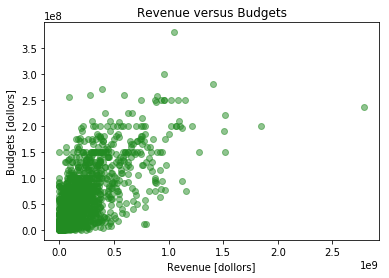

The covariance between averge votes and the budget is: 
[[ 1.          0.63111374]
 [ 0.63111374  1.        ]]


In [7]:

revenue_budget = [] # tuples of vote_averages and budget for each movie
for title in tmdb_5000_movies.keys():
    # we treat movie´s with less than 300 vote count as noise
    if float(tmdb_5000_movies[title]['vote_count'])  > 300:
        budget = float(tmdb_5000_movies[title]['budget'])
        revenue = float(tmdb_5000_movies[title]['revenue'])
        revenue_budget.append((revenue, budget))
    

revenues = []
budgets = []

# sort by rating since that is going to be our x-axis
for values in sorted(revenue_budget):
    # if a movie has no budget, we treat it as noise
    if values[1] > 0:
        revenues.append(values[0])
        budgets.append(values[1])
    
   

# Lets plot the data
plt.plot(revenues, budgets, 'o', alpha = 0.5, color = 'forestgreen')
plt.title('Revenue versus Budgets')
plt.xlabel('Revenue [dollors]')
plt.ylabel('Budgets [dollors]')
plt.show()

# find the covariance:
print "The covariance between averge votes and the budget is: "
print np.corrcoef(vote_averages, budgets)
    

### Revenue Versus Gender ratio

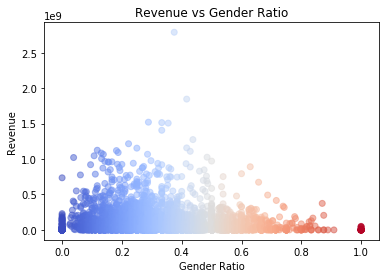

Gender Ratio: The closer to the value 1, the bigger ratio of females
Gender Ratio: The closer to the value 0, the bigger ratio of males
The covariance between Revenue and the gender ratio is: 
[[ 1.         -0.08249627]
 [-0.08249627  1.        ]]


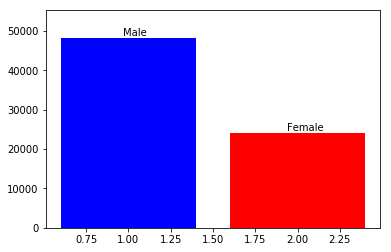


Number of actors

Number of females: 24158
Number of males: 48264
Total number of actors: 72422


In [99]:
total_number_off_females = 0
total_number_off_males = 0
revenue_gender_ratio = [] # tuples of revenue and gender ratio
for title in tmdb_5000_credits.keys():
    number_of_males = 0
    number_of_females = 0
    for actor in tmdb_5000_credits[title]['cast']:
        # count how many females and males are in each movie
        gender_type = actor['gender']
        if gender_type == 1:
            number_of_females += 1
        elif gender_type == 2:
             number_of_males+= 1
        else:
            # if a person has no gender or gender is not specified we tread it as noise 
            pass
    total_number_off_females += number_of_females
    total_number_off_males += number_of_males
            
            
    # if both number of males and females is 0, we treat the data as noise, since we need to have actors  
    try: 
        revenue_gender_ratio.append(( number_of_females / (number_of_males + number_of_females), float(tmdb_5000_movies[title]['revenue'])))
        
    except  ZeroDivisionError:
        pass
    
    

gender_ratio = []
revenue = []

# sort the gender since it is going to be our x axis
for values in sorted(revenue_gender_ratio):
    gender_ratio.append(values[0])
    revenue.append(values[1])
    
# for color of the plots
t = range(len(gender_ratio))

#plt.scatter(gender_ratio, revenue, c=t, cmap='cool', alpha = 0.5)
plt.scatter(gender_ratio, revenue, c=gender_ratio, cmap='coolwarm', alpha = 0.5)
#c=y, s=500
plt.title('Revenue vs Gender Ratio')
plt.xlabel('Gender Ratio')
plt.ylabel('Revenue')
plt.show()


print "Gender Ratio: The closer to the value 1, the bigger ratio of females"
print "Gender Ratio: The closer to the value 0, the bigger ratio of males"
# find the covariance:
print "The covariance between Revenue and the gender ratio is: "
print np.corrcoef(gender_ratio, revenue)


plt.bar([1,2], [total_number_off_males, total_number_off_females], color = ['blue', 'red'])
plt.ylim([0, max(total_number_off_females, total_number_off_males) + 7000])
plt.text(1.94,total_number_off_females + 500, 'Female')
plt.text(0.97,total_number_off_males + 500, 'Male')
plt.show()


print
print '\033[1m' + 'Number of actors' # this is bold
print '\033[0m' # stops the boldness
print 'Number of females: {}'.format(total_number_off_females)
print 'Number of males: {}'.format(total_number_off_males)
print 'Total number of actors: {}'.format(total_number_off_males + total_number_off_females)




    


### Histogram of ratings

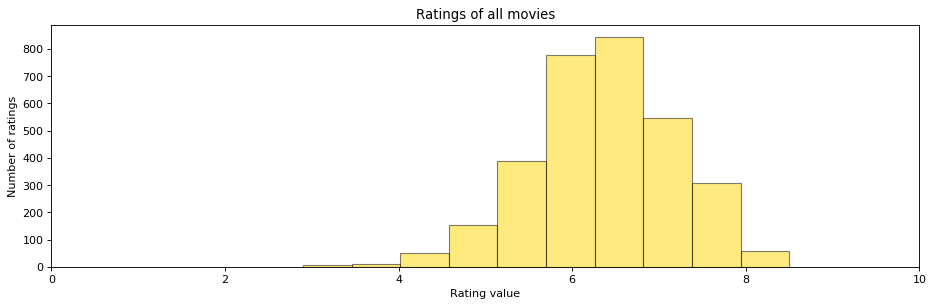

In [111]:
ratings = []
for title in tmdb_5000_movies.keys():
    # we do not accept vote average for fewer than 100 votes
    if float(tmdb_5000_movies[title]["vote_count"]) > 100:
        ratings.append(float(tmdb_5000_movies[title]["vote_average"]))

plt.figure(num=None, figsize=(14, 4), dpi=80, facecolor='w', edgecolor='k') 
plt.hist(ratings, color = 'gold', alpha = 0.5, histtype='bar', ec='black')
plt.xlabel('Rating value')
plt.ylabel('Number of ratings')
plt.title('Ratings of all movies')
# show all the posibilities
plt.xlim([0,10])
plt.show()
    

### Cout from each category

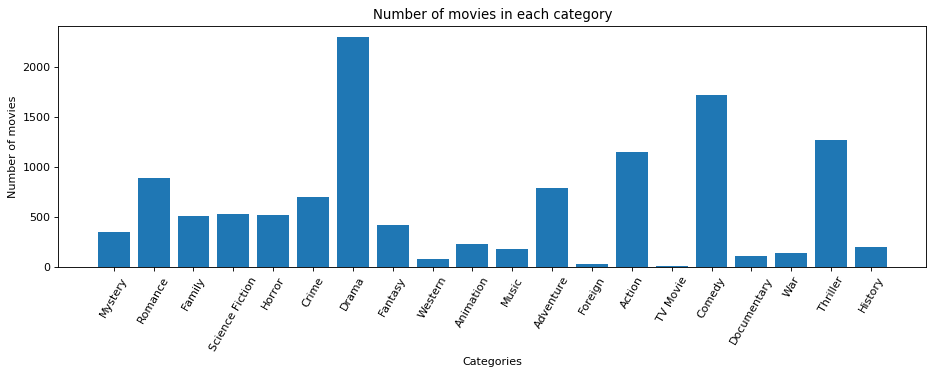

In [11]:

genres = []
for title in tmdb_5000_movies.keys():
    for names in tmdb_5000_movies[title]['genres']:
        # append all values for genre to the genres list
        genres.append(names['name'])
        
# get the count of all genres
number_in_genres = Counter(genres)


# get the data to plot
unique_genres = []
count = []
for key, value in number_in_genres.items():
    count.append(value)
    unique_genres.append(key)
    
plt.figure(num=None, figsize=(14, 4), dpi=80, facecolor='w', edgecolor='k')    
plt.bar(range(len(count)), count)
plt.xlabel('Categories')
plt.ylabel('Number of movies')
plt.title('Number of movies in each category')
plt.xticks( range(len(unique_genres)), unique_genres, rotation=60 )

plt.show()
    

In [12]:
number_in_genres

Counter({u'Action': 1152,
         u'Adventure': 789,
         u'Animation': 234,
         u'Comedy': 1722,
         u'Crime': 696,
         u'Documentary': 110,
         u'Drama': 2296,
         u'Family': 513,
         u'Fantasy': 423,
         u'Foreign': 34,
         u'History': 197,
         u'Horror': 519,
         u'Music': 185,
         u'Mystery': 348,
         u'Romance': 893,
         u'Science Fiction': 534,
         u'TV Movie': 8,
         u'Thriller': 1273,
         u'War': 144,
         u'Western': 82})

## Production Companies

plot the number of 10 most common production companies as well as the total number of production companies

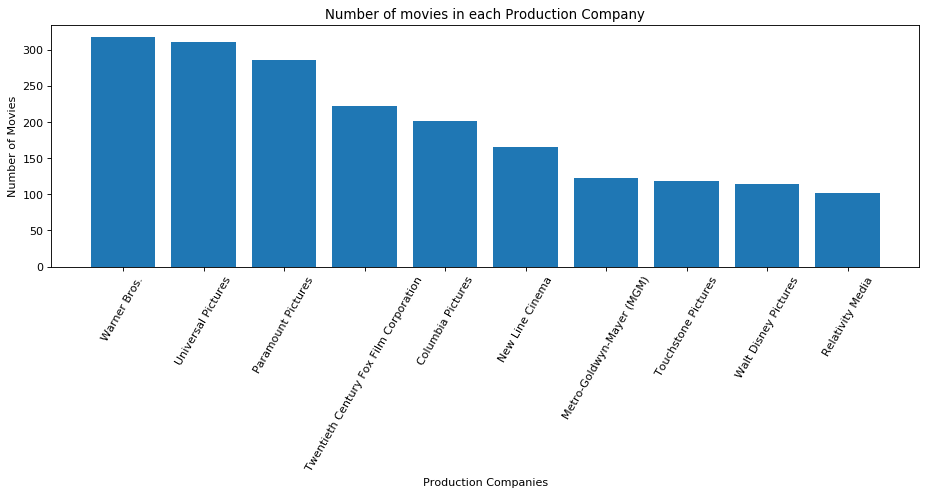

The total number of production companies is: 5016


In [69]:
# find the number of production companies

production_companies = []
for title in tmdb_5000_movies.keys():
    for company in tmdb_5000_movies[title]['production_companies']:
        production_companies.append(company['name'])
        

# count number of all production companies
production_companies_count = Counter(production_companies)

# top 10 most common production companies
most_comon_production_companies = production_companies_count.most_common(10)

# get the data to plot
unique_production_companies = []
count = []
for company_count in most_comon_production_companies:
    count.append(company_count[1])
    unique_production_companies.append(company_count[0])
    
plt.figure(num=None, figsize=(14, 4), dpi=80, facecolor='w', edgecolor='k')    
plt.bar(range(len(count)), count)
plt.xlabel('Production Companies')
plt.ylabel('Number of Movies')
plt.title('Number of movies in each Production Company')
plt.xticks( range(len(unique_production_companies)), unique_production_companies, rotation=60 )

plt.show()
    
print "The total number of production companies is: {}".format(len(production_companies_count))

In [67]:
most_comon_production_companies

[(u'Warner Bros.', 318),
 (u'Universal Pictures', 311),
 (u'Paramount Pictures', 285),
 (u'Twentieth Century Fox Film Corporation', 222),
 (u'Columbia Pictures', 201),
 (u'New Line Cinema', 165),
 (u'Metro-Goldwyn-Mayer (MGM)', 122),
 (u'Touchstone Pictures', 118),
 (u'Walt Disney Pictures', 114),
 (u'Relativity Media', 102)]

## Make the Networks

-- The first network connects movie thorugh number of comon actors

-- The second network connects movies thorugh number of kewords

Actor Network


C:\Users\helga\Anaconda2\lib\site-packages\networkx\drawing\nx_pylab.py:126: MatplotlibDeprecationWarning: pyplot.hold is deprecated.
    Future behavior will be consistent with the long-time default:
    plot commands add elements without first clearing the
    Axes and/or Figure.
  b = plt.ishold()
C:\Users\helga\Anaconda2\lib\site-packages\networkx\drawing\nx_pylab.py:138: MatplotlibDeprecationWarning: pyplot.hold is deprecated.
    Future behavior will be consistent with the long-time default:
    plot commands add elements without first clearing the
    Axes and/or Figure.
  plt.hold(b)
C:\Users\helga\Anaconda2\lib\site-packages\matplotlib\__init__.py:917: UserWarning: axes.hold is deprecated. Please remove it from your matplotlibrc and/or style files.
  warnings.warn(self.msg_depr_set % key)
C:\Users\helga\Anaconda2\lib\site-packages\matplotlib\rcsetup.py:152: UserWarning: axes.hold is deprecated, will be removed in 3.0
  warnings.warn("axes.hold is deprecated, will be removed in

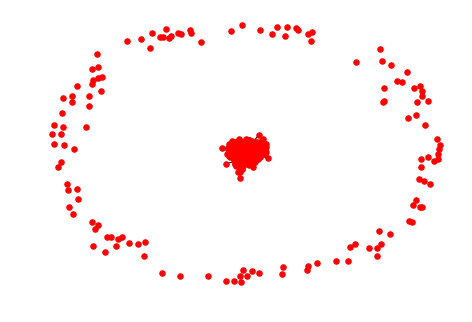

In [5]:
# lets build the first network
G_actors = nx.Graph()

# get all the movies
movies = tmdb_5000_movies.keys()

# add the nodes
G_actors.add_nodes_from(movies)

# ratio of number of common actors that movies have to pass to be consider similar
connecting_actor_ratio = 0.1



# loop thorugh all the pairs and check if we have enough evidance to insert a link
for i in xrange(len(movies)):
    
    # extract all the actors from the first movie
    actors_i = [actor_i['id'] for actor_i in tmdb_5000_credits[movies[i]]['cast']]
    
    for j in xrange(i + 1, len(movies)):
        
        # extract all the actors from the second movie
        actors_j = [actor_j['id'] for actor_j in  tmdb_5000_credits[movies[j]]['cast']]
        
        # ensure we dont divide by zero
        if min(len(actors_i), len(actors_j)) != 0:
                
            # claculate the actor ratio of the two movies, using the smaller keywords list
            actor_ratio = len(set(actors_i).intersection(set(actors_j))) / min(len(actors_i), len(actors_j))

            # if number of comon actors is more than the 'num_common_keywords' we insert a edge, between the nodes
            if len(set(actors_j).intersection(set(actors_i))) > connecting_actor_ratio:
                G_actors.add_edge(movies[i], movies[j])



print "Actor Network"
nx.draw(G_actors, node_size = 30, node_color = 'red')
plt.show()






Keyword Network


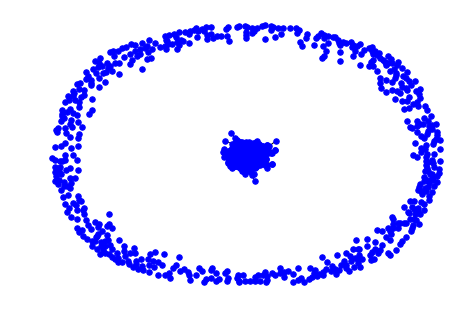

In [7]:
# lets build the second network
G_keywords = nx.Graph()

# all movies
movies = tmdb_5000_movies.keys()

# add the nodes
G_keywords.add_nodes_from(movies)

# ratio of similar keywords that movies have to pass to be consider similar
min_keyword_ratio = 0.3


# loop thorugh all the pairs and check if we have enough evidance to insert a link
for i in xrange(len(movies)):
    
    # extract all the keywords from the first movie
    keywords_i = [keyword_i['id'] for keyword_i in tmdb_5000_movies[movies[i]]['keywords']]
    
    for j in xrange(i + 1, len(movies)):

        # all the keywords from the second movie
        keywords_j = [keyword_j['id'] for keyword_j in tmdb_5000_movies[movies[j]]['keywords']]
        
        # ensure that we dont divide by zero
        if min(len(keywords_i), len(keywords_j)) != 0:
            
            # claculate the keyword ratio of the two movies, using the smaller keywords list
            keyword_ratio = len(set(keywords_i).intersection(set(keywords_j))) / min(len(keywords_i), len(keywords_j))
        
            # if number of comon actors is more than the 'num_common_keywords' we insert a edge, between the nodes
            if keyword_ratio > min_keyword_ratio:
                G_keywords.add_edge(movies[i], movies[j])

        

print "Keyword Network"
nx.draw(G_keywords, node_size = 30, node_color = 'blue')
plt.show()


## The Degree Distribution


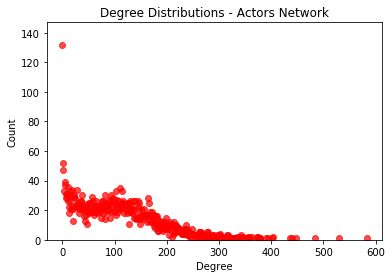

In [53]:
actors_degree = G_actors.degree(movies).values()

actors_degree_counts = Counter(actors_degree)

x = []
y = []
for values in sorted(actors_degree_counts.items(), key=lambda pair: pair[1]):
    x.append(values[0])
    y.append(values[1])

plt.plot(x, y, 'o', color = 'red', alpha = 0.7)
plt.title('Degree Distributions - Actors Network')
plt.xlabel('Degree')
plt.ylabel('Count')
plt.ylim((0, max(y) + 15))
plt.show()

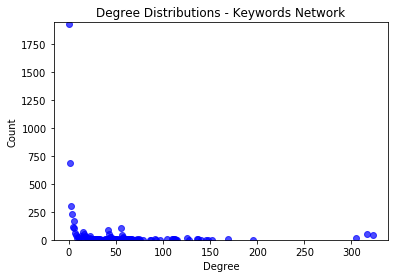

In [54]:
keywords_degree = G_keywords.degree(movies).values()

keywords_degree_counts = Counter(keywords_degree)

x = []
y = []
for values in sorted(keywords_degree_counts.items(), key=lambda pair: pair[1]):
    x.append(values[0])
    y.append(values[1])

plt.plot(x, y, 'o', color = 'blue', alpha = 0.7)
plt.title('Degree Distributions - Keywords Network')
plt.xlabel('Degree')
plt.ylabel('Count')
plt.ylim((0, max(y) + 15))
plt.show()

## Calculate the Clustering Coefficent for the Networks

In [55]:
print "The clustering coefficent for the actors network is: {}".format(nx.average_clustering(G_actors))

print "The clustering coefficent for the keywords network is: {}".format(nx.average_clustering(G_keywords))

The clustering coefficent for the actors network is: 0.22495958734
The clustering coefficent for the keywords network is: 0.295597631442


### Calculate the Clustering Coefficent for the Giant components

In [9]:
G_giant_actors = max(nx.connected_component_subgraphs(G_actors), key=len)
G_giant_keywords = max(nx.connected_component_subgraphs(G_keywords), key=len)

print "The clustering coefficent for the giant compenent of the actors network is: {}".format(nx.average_clustering(G_giant_actors))
print "The clustering coefficent for the giant compenent of the keywords network is: {}".format(nx.average_clustering(G_giant_keywords))

The clustering coefficent for the giant compenent of the actors network is: 0.23142006413
The clustering coefficent for the giant compenent of the keywords network is: 0.437948440384


###  Calculate the Betweenness

In [16]:
print "The Betweenness for the top ten movies in actors network is:\n"
for key, value in Counter(nx.betweenness_centrality(G_actors)).most_common(10):
    print key, value
    
print "\nThe Betweenness for the top ten movies in giant compenent of the actors network is:\n"
for key, value in Counter(nx.betweenness_centrality(G_giant_actors)).most_common(10):
    print key, value
    

print "\nThe Betweenness for the top ten movies in keywords network is:\n"
for key, value in Counter(nx.betweenness_centrality(G_keywords)).most_common(10):
    print key, value
    
    
print "\nThe Betweenness for the top ten movies in giant component of the kewords network is:\n"
for key, value in Counter(nx.betweenness_centrality(G_giant_keywords)).most_common(10):
    print key, value

#print "The Betweenness for the actors network is: {}".format(nx.betweenness_centrality(G_actors))



#print "The Betweenness for the giant compenent of the actors network is: {}".format(nx.betweenness_centrality(G_giant_actors))
#print "The Betweenness for the keywords network is: {}".format(nx.betweenness_centrality(G_keywords))
#print "The Betweenness for  giant compenent of the giant keywords is: {}".format(nx.betweenness_centrality(G_giant_keywords))

The Betweenness for the top ten movies in actors network is:

Pearl Harbor 0.00538013807768
Movie 43 0.00502131083344
The Dark Knight Rises 0.00364176975842
American Gangster 0.00336783699325
Armageddon 0.00298474217516
Star Trek 0.00296132887684
Batman v Superman: Dawn of Justice 0.00266470026665
Zoolander 0.00265999496788
The Aviator 0.00261402266815
Paris, je t'aime 0.00256501410999

The Betweenness for the top ten movies in giant compenent of the actors network is:

Pearl Harbor 0.0056936953446
Movie 43 0.0053139554605
The Dark Knight Rises 0.0038540140086
American Gangster 0.00356411629831
Armageddon 0.00315869451344
Star Trek 0.00313391667582
Batman v Superman: Dawn of Justice 0.00282000039477
Zoolander 0.00281502086872
The Aviator 0.00276636927927
Paris, je t'aime 0.00271450447665

The Betweenness for the top ten movies in keywords network is:

Youth in Revolt 0.0184307653795
Clerks II 0.014804436193
Our Kind of Traitor 0.0142053737955
Vamps 0.0136476727895
Step Up 3D 0.01208471

In [112]:
 tmdb_5000_movies['Avatar']

{'budget': '237000000',
 'genres': [{u'id': 28, u'name': u'Action'},
  {u'id': 12, u'name': u'Adventure'},
  {u'id': 14, u'name': u'Fantasy'},
  {u'id': 878, u'name': u'Science Fiction'}],
 'homepage': 'http://www.avatarmovie.com/',
 'id': '19995',
 'keywords': [{u'id': 1463, u'name': u'culture clash'},
  {u'id': 2964, u'name': u'future'},
  {u'id': 3386, u'name': u'space war'},
  {u'id': 3388, u'name': u'space colony'},
  {u'id': 3679, u'name': u'society'},
  {u'id': 3801, u'name': u'space travel'},
  {u'id': 9685, u'name': u'futuristic'},
  {u'id': 9840, u'name': u'romance'},
  {u'id': 9882, u'name': u'space'},
  {u'id': 9951, u'name': u'alien'},
  {u'id': 10148, u'name': u'tribe'},
  {u'id': 10158, u'name': u'alien planet'},
  {u'id': 10987, u'name': u'cgi'},
  {u'id': 11399, u'name': u'marine'},
  {u'id': 13065, u'name': u'soldier'},
  {u'id': 14643, u'name': u'battle'},
  {u'id': 14720, u'name': u'love affair'},
  {u'id': 165431, u'name': u'anti war'},
  {u'id': 193554, u'name': u

In [113]:
 tmdb_5000_credits['Avatar']

{'cast': [{u'cast_id': 242,
   u'character': u'Jake Sully',
   u'credit_id': u'5602a8a7c3a3685532001c9a',
   u'gender': 2,
   u'id': 65731,
   u'name': u'Sam Worthington',
   u'order': 0},
  {u'cast_id': 3,
   u'character': u'Neytiri',
   u'credit_id': u'52fe48009251416c750ac9cb',
   u'gender': 1,
   u'id': 8691,
   u'name': u'Zoe Saldana',
   u'order': 1},
  {u'cast_id': 25,
   u'character': u'Dr. Grace Augustine',
   u'credit_id': u'52fe48009251416c750aca39',
   u'gender': 1,
   u'id': 10205,
   u'name': u'Sigourney Weaver',
   u'order': 2},
  {u'cast_id': 4,
   u'character': u'Col. Quaritch',
   u'credit_id': u'52fe48009251416c750ac9cf',
   u'gender': 2,
   u'id': 32747,
   u'name': u'Stephen Lang',
   u'order': 3},
  {u'cast_id': 5,
   u'character': u'Trudy Chacon',
   u'credit_id': u'52fe48009251416c750ac9d3',
   u'gender': 1,
   u'id': 17647,
   u'name': u'Michelle Rodriguez',
   u'order': 4},
  {u'cast_id': 8,
   u'character': u'Selfridge',
   u'credit_id': u'52fe48009251416c750